In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import torch
print(torch.__version__)          # Should show `2.5.1+cu121`
print(torch.cuda.is_available())  # Should return `True`
print(torch.cuda.get_device_name(0))

2.6.0+cu124
True
Tesla T4


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import xgboost
import seaborn as sns

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import  classification_report
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [ ]:
df.shape

(1406, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

In [ ]:
# Checking the missing values
missing = df.isna().sum()
print(missing)

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1134
SEED          1134
YEAR             0
dtype: int64


In [ ]:
# Get the descriptive statistics

df.describe() # it ignores NULL values

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,...,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,272.000000,1406.000000
mean,31.570413,16.724751,103.848720,103.849716,0.493272,50.406757,50.595448,18.458535,18.391821,28.881223,...,34.612233,34.885633,49.486415,49.642745,34.662873,34.830228,69.292461,-7.855121,8.790441,2017.502134
std,2.586927,6.492069,7.250998,6.422037,0.255095,3.042034,2.779066,1.949515,2.082490,4.045938,...,4.798377,5.735014,3.366320,3.211512,2.670789,2.333992,2.771836,7.001387,4.676650,1.119066
min,24.000000,1.000000,82.900000,85.200000,0.026600,40.000000,41.100000,13.500000,10.200000,15.000000,...,21.600000,21.800000,37.700000,38.400000,26.700000,27.500000,60.300000,-25.200000,1.000000,2016.000000
25%,30.000000,12.000000,98.900000,99.225000,0.281400,48.400000,48.800000,17.200000,17.000000,26.200000,...,31.300000,30.700000,47.200000,47.525000,32.800000,33.200000,67.400000,-13.100000,5.000000,2017.000000
50%,31.000000,16.000000,103.400000,104.000000,0.474000,50.400000,50.600000,18.400000,18.300000,29.000000,...,34.500000,34.300000,49.400000,49.600000,34.600000,34.800000,69.200000,-8.450000,9.000000,2018.000000
75%,33.000000,21.000000,108.300000,108.275000,0.711075,52.400000,52.400000,19.700000,19.700000,31.600000,...,37.800000,38.700000,51.600000,51.775000,36.500000,36.400000,71.000000,-3.100000,13.000000,2019.000000
max,40.000000,37.000000,128.400000,124.000000,0.974400,59.800000,59.500000,25.900000,27.600000,42.000000,...,49.400000,58.500000,62.600000,61.200000,43.400000,43.100000,83.400000,11.600000,16.000000,2019.000000


In [ ]:
#  Get the duplicate rows
dupplicated_rows_df = df[df.duplicated()]

# Dupplicated_rows_df's shape
print("dupplicated_rows_df's shape : ", dupplicated_rows_df.shape)

dupplicated_rows_df's shape :  (0, 24)


In [ ]:
#unique valus of target features :
gat_unique_values = df['POSTSEASON'].unique()
print(gat_unique_values)

# Get count of each category
df['POSTSEASON'].value_counts()

['2ND' 'Champions' 'E8' 'F4' nan 'R32' 'R64' 'R68' 'S16']


,count
POSTSEASON,
R64,128
R32,64
S16,32
E8,16
R68,16
F4,8
2ND,4
Champions,4


In [ ]:
# Get categorical features
cat_features = df.select_dtypes(include=[object]).columns
print(cat_features)

Index(['TEAM', 'CONF', 'POSTSEASON'], dtype='object')


In [ ]:
# get num features :
num_features = df.select_dtypes(include=[np.number]).columns
print(num_features)

Index(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'SEED', 'YEAR'],
      dtype='object')


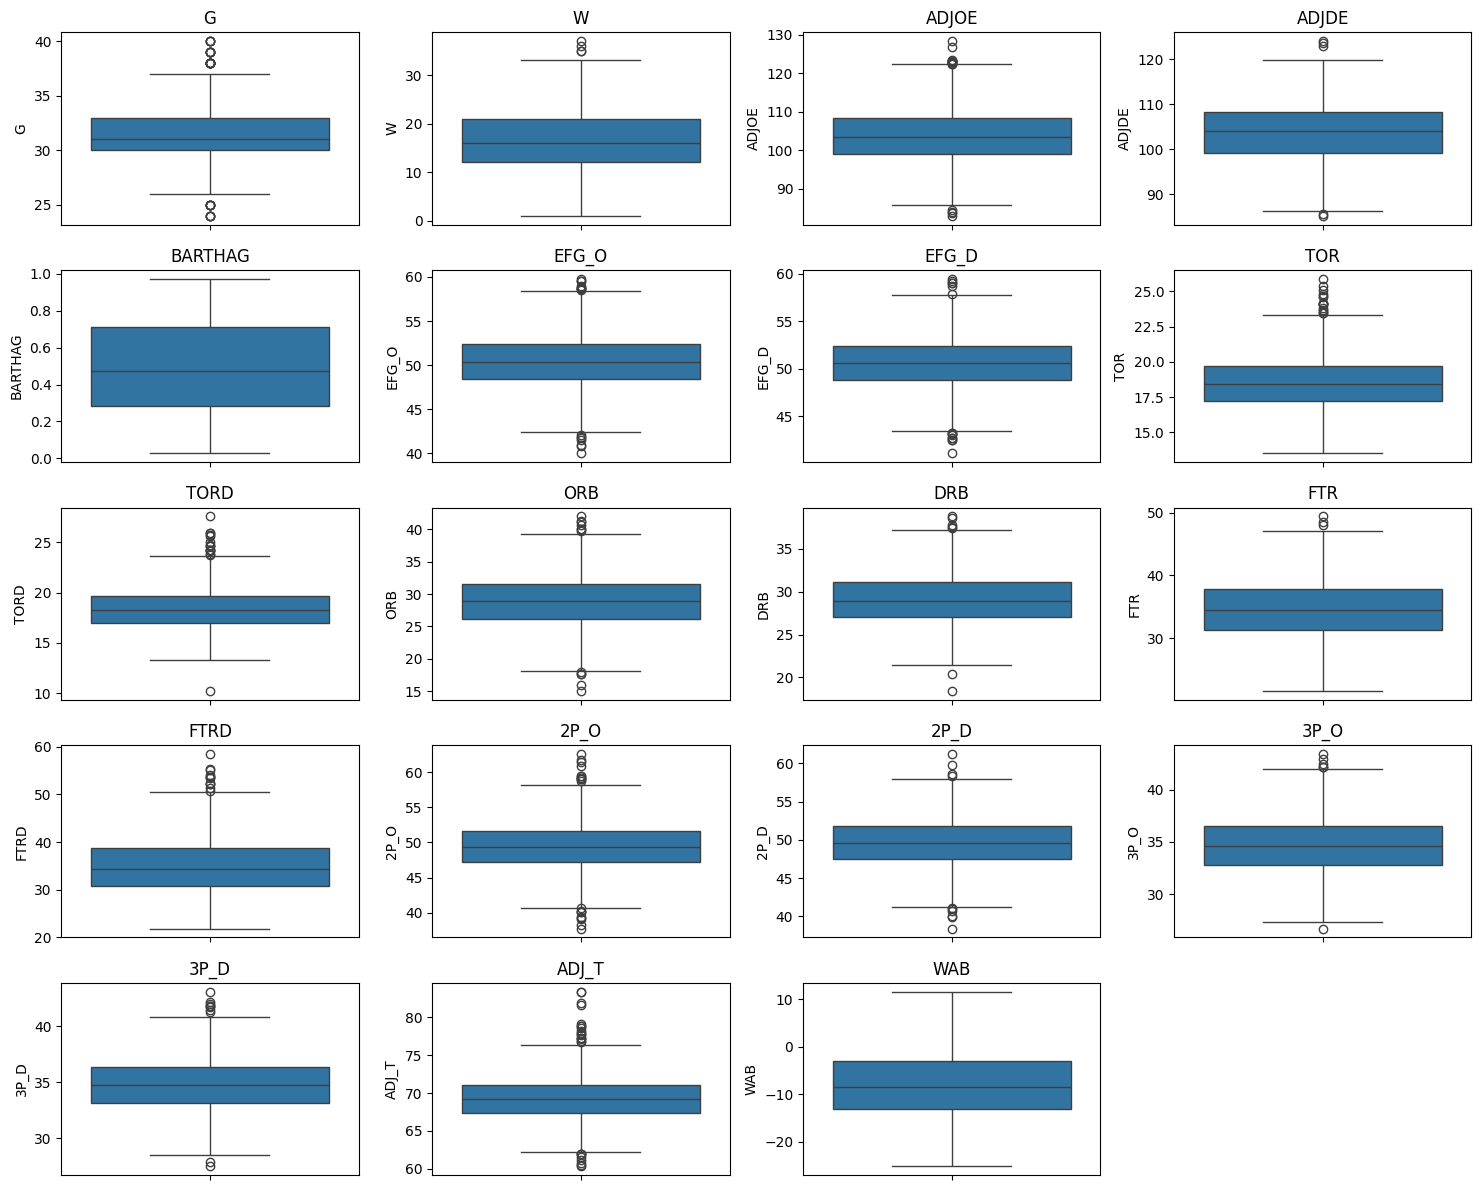

In [ ]:
plt.figure(figsize=(15, 12))  # Adjusted figure size for better visibility

# Calculate the number of rows and columns for subplots
num_features_len = len(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD','ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T','WAB'])
num_cols = 4 # Number of columns
num_rows = (num_features_len + num_cols - 1) // num_cols  # Calculate number of rows

# Loop through each feature to create boxplots
for i, col in enumerate(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD','ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T','WAB']):
    plt.subplot(num_rows, num_cols,i+ 1)  # Use calculated rows and columns
    sb.boxplot(data=df[col])
    plt.title(col)  # Add a title for each plot

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

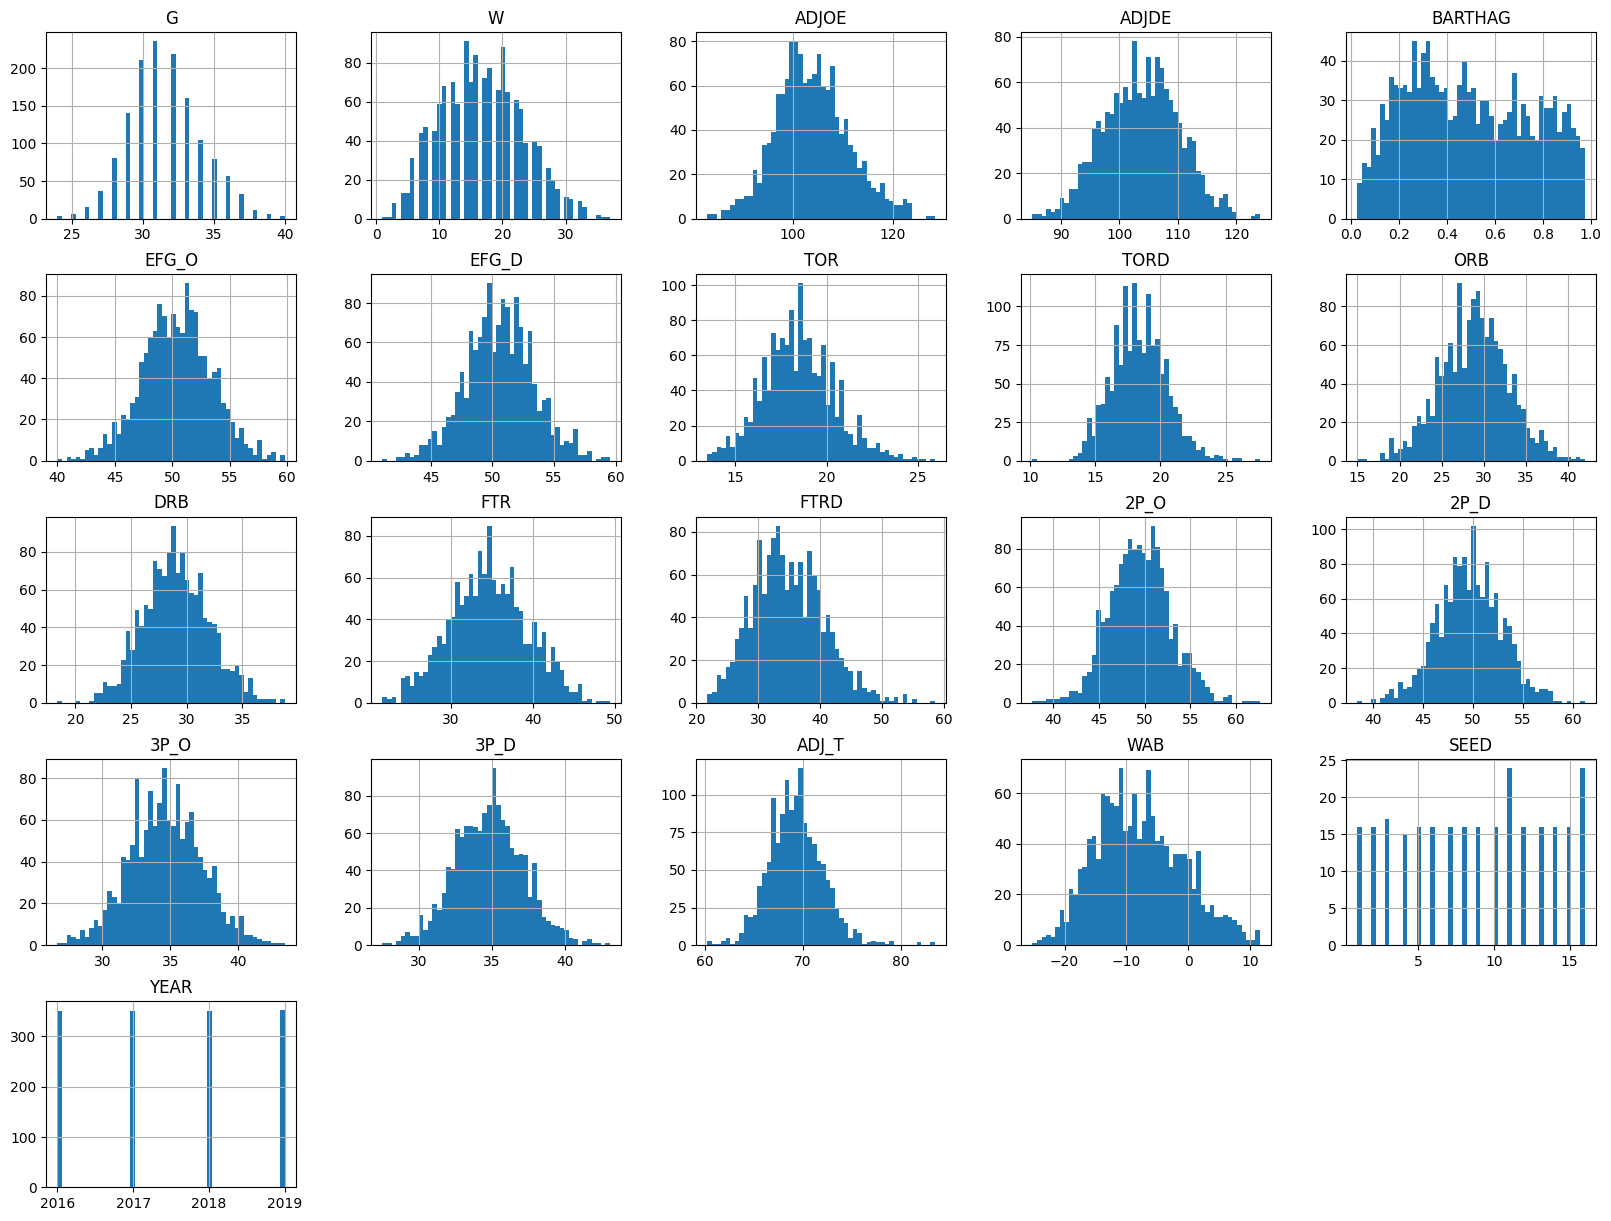

In [ ]:
## Visualization of histograms of numerical features

df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# making Group by POSTSEASON

ave_rancking = df[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD','ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T','WAB','POSTSEASON']].groupby("POSTSEASON").mean()
ave_rancking

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
POSTSEASON,,,,,,,,,,,,,,,,,,,
2ND,39.250000,33.500000,117.675000,89.200000,0.958250,54.150000,44.975000,15.825000,19.400000,30.900000,27.450000,33.725000,30.975000,54.425000,43.325000,35.650000,32.025000,69.150000,7.550000
Champions,39.250000,34.750000,123.875000,91.600000,0.969475,55.625000,47.000000,15.550000,18.725000,32.375000,26.725000,31.725000,28.650000,54.975000,46.275000,37.825000,32.100000,67.450000,9.750000
E8,36.812500,28.375000,118.118750,93.200000,0.927787,53.887500,47.500000,16.875000,18.968750,33.212500,28.581250,36.693750,31.093750,53.593750,46.131250,36.350000,33.250000,69.200000,6.562500
F4,37.750000,29.500000,116.300000,93.562500,0.917913,53.987500,47.312500,17.862500,19.850000,31.012500,30.400000,33.337500,30.100000,51.750000,46.737500,38.175000,32.237500,68.562500,5.300000
R32,34.593750,25.484375,113.298438,95.596875,0.860094,52.654688,47.715625,16.860937,18.965625,31.112500,28.129687,34.412500,32.589062,51.781250,46.726562,36.137500,32.989063,68.550000,2.935938
R64,33.101562,23.117188,109.350781,99.208594,0.722429,52.388281,48.862500,17.539062,18.647656,30.026563,27.937500,35.955469,33.122656,51.367188,47.810938,36.086719,33.821094,69.085938,-0.837500
R68,32.375000,20.062500,106.275000,103.012500,0.564462,51.287500,49.381250,17.775000,19.131250,29.281250,30.231250,36.937500,35.418750,50.831250,49.362500,34.631250,32.956250,69.993750,-4.550000
S16,36.062500,27.250000,116.753125,94.581250,0.913384,53.581250,47.812500,16.934375,18.600000,32.040625,28.206250,34.512500,30.371875,52.693750,46.612500,36.690625,33.393750,68.543750,5.106250


<Axes: xlabel='POSTSEASON'>

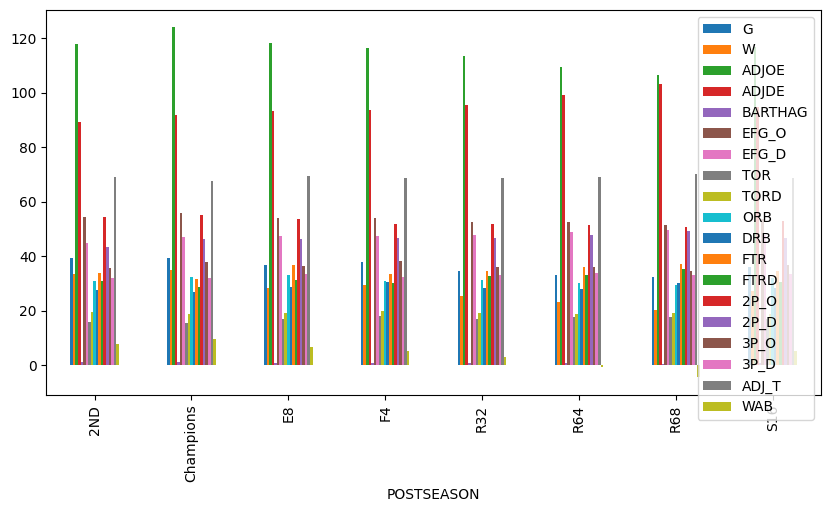

In [ ]:
# graph the group by ❤️❤️❤️❤️

ave_rancking.plot(kind="bar",figsize=(10,5))

In [ ]:
import numpy as np

# Define the custom order mapping
custom_order = {
    'Champions': 1,
    '2ND': 2,
    'F4': 3,
    'E8': 4,
    'S16': 5,
    'R32': 6,
    'R64': 7,
    'R68': 8
}

# Apply the mapping to the POSTSEASON column
df['rank_encoded'] = df['POSTSEASON'].map(custom_order)

# Replace NaN values with 0
df['rank_encoded'] = df['rank_encoded'].fillna(0).astype(float)

# Display the updated DataFrame
print(df)


                TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0     North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1          Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2         Notre Dame   ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3           Virginia   ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4             Kansas   B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
...              ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
1401         Houston  Amer  37  33  115.7   90.5   0.9439   52.1   42.5  16.5   
1402        Michigan   B10  37  30  114.6   85.6   0.9665   51.6   44.1  13.9   
1403          Oregon   P12  38  25  108.1   91.7   0.8687   52.0   46.4  17.8   
1404             LSU   SEC  35  28  117.9   96.6   0.9081   51.2   49.9  17.9   
1405       Tennessee   SEC  36  31  122.8   95.2   0.9488   55.3   48.1  15.8   

      ...  2P_O  2P_D  3P_O

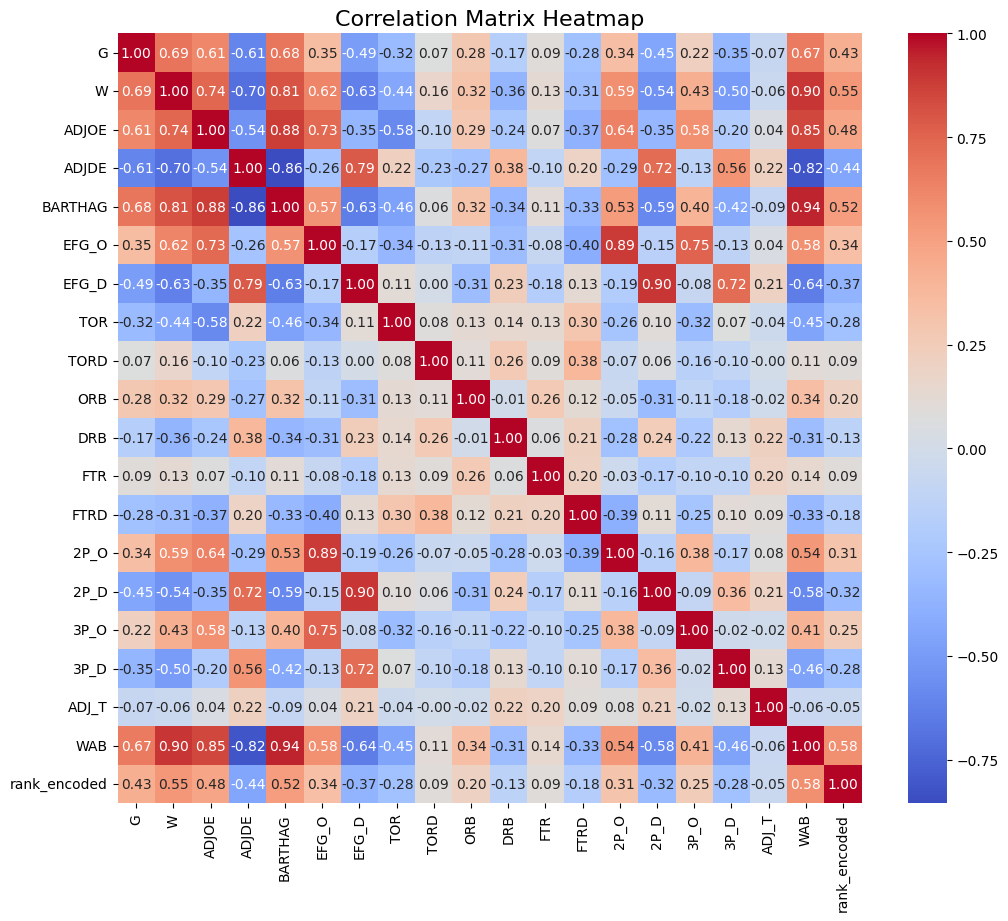

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
                  'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
                  '3P_D', 'ADJ_T', 'WAB','rank_encoded']].corr()

# Set the figure size
plt.figure(figsize=(12, 10))  # Adjust width and height as needed

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title (optional)
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()


In [ ]:
# Correlation of target variable `'rank_encoded` with other variables
abs(corr_matrix['rank_encoded']).sort_values(ascending=False)

,rank_encoded
rank_encoded,1.000000
WAB,0.584345
W,0.546835
BARTHAG,0.520590
ADJOE,0.484709
ADJDE,0.444165
G,0.432864
EFG_D,0.368590
EFG_O,0.338912
2P_D,0.322931


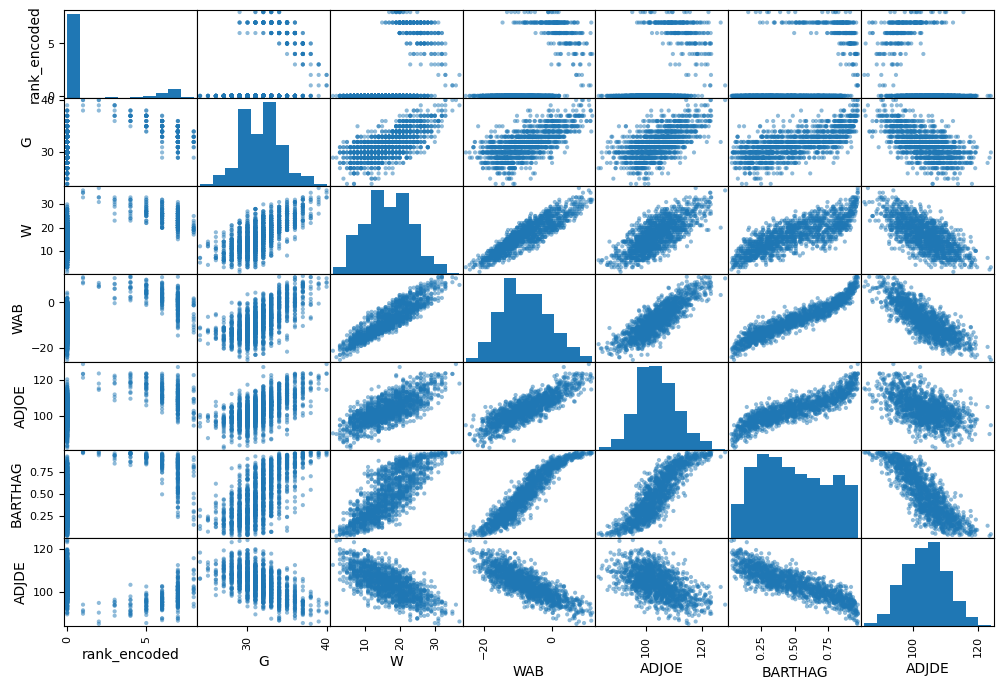

In [ ]:
# the 6 more correlated features to 'rank_encoded': target
attributes = ['rank_encoded','G', 'W', 'WAB', 'ADJOE','BARTHAG','ADJDE']
scatter_matrix(frame=df[attributes], figsize=(12, 8))
plt.show()

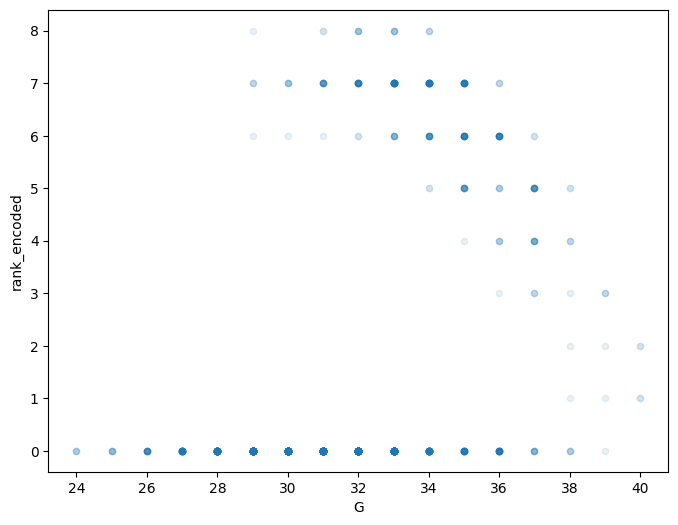

In [ ]:
# ==> The most important feature for target prediction is 'G` game played
df.plot(kind='scatter', x='G', y='rank_encoded', figsize=(8,6), alpha=0.1)
plt.show()

In [ ]:
#******************************************************************************************************************************************

In [ ]:
#drop 3P_D 3P_O 2PO 2PD EFG_O EFG_D because highly coor features
#drop 'year' we dont need it
#Features with low correlation (e.g., < 0.1) are less useful so ze drop DRB TORD ADJ_T  FTR 3P_D
# Features to Keep:G W  WAB  ADJOE  BARTHAG  ADJDE
df = df[['G','W', 'WAB',  'ADJOE',  'BARTHAG' , 'ADJDE','TEAM','CONF','rank_encoded' ]]

In [ ]:
df.head()

,G,W,WAB,ADJOE,BARTHAG,ADJDE,TEAM,CONF,rank_encoded
0,40,33,8.6,123.3,0.9531,94.9,North Carolina,ACC,2.0
1,40,35,8.9,123.1,0.9703,90.9,Villanova,BE,1.0
2,36,24,2.3,118.3,0.8269,103.3,Notre Dame,ACC,4.0
3,37,29,8.6,119.9,0.9600,91.0,Virginia,ACC,4.0
4,37,32,11.6,120.9,0.9662,90.4,Kansas,B12,4.0


In [ ]:
# Select the 'TEAM' and 'CONF' columns
df2 = df[['TEAM', 'CONF']]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df2, columns=['TEAM', 'CONF'], drop_first=True)

# Convert boolean values (if any) to 1.0 and 0.0
df_encoded = df_encoded.astype(float)

# Display the encoded DataFrame
print(df_encoded.head())


   TEAM_Air Force  TEAM_Akron  TEAM_Alabama  TEAM_Alabama A&M  \
0             0.0         0.0           0.0               0.0   
1             0.0         0.0           0.0               0.0   
2             0.0         0.0           0.0               0.0   
3             0.0         0.0           0.0               0.0   
4             0.0         0.0           0.0               0.0   

   TEAM_Alabama St.  TEAM_Albany  TEAM_Alcorn St.  TEAM_American  \
0               0.0          0.0              0.0            0.0   
1               0.0          0.0              0.0            0.0   
2               0.0          0.0              0.0            0.0   
3               0.0          0.0              0.0            0.0   
4               0.0          0.0              0.0            0.0   

   TEAM_Appalachian St.  TEAM_Arizona  ...  CONF_P12  CONF_Pat  CONF_SB  \
0                   0.0           0.0  ...       0.0       0.0      0.0   
1                   0.0           0.0  ...       0

In [ ]:
df = pd.concat([df, df_encoded], axis=1)
df =df.drop(['TEAM', 'CONF'], axis=1)
df.head(100)

,G,W,WAB,ADJOE,BARTHAG,ADJDE,rank_encoded,TEAM_Air Force,TEAM_Akron,TEAM_Alabama,...,CONF_P12,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC
0,40,33,8.6,123.3,0.9531,94.9,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40,35,8.9,123.1,0.9703,90.9,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,24,2.3,118.3,0.8269,103.3,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37,29,8.6,119.9,0.9600,91.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37,32,11.6,120.9,0.9662,90.4,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30,6,-16.4,98.8,0.3161,105.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,30,14,-8.5,105.0,0.4927,105.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,33,23,-1.6,110.1,0.6855,102.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,31,20,-4.3,106.0,0.6935,98.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = df.drop("rank_encoded", axis=1) # input variables (X is dataframe)
y = df["rank_encoded"].to_numpy() # output variable (y is an array)

# `stratify` makes a split with the same proportion of y in training and testing sets
bins = np.linspace(y.min(), y.max(), 100)
y_binned = np.digitize(y, bins)

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, shuffle=True, stratify=y_binned,random_state=22)

print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

X_train: (1124, 391) X_test: (282, 391)


In [ ]:
#normalisation
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
column_names_yes =list(df.columns )

In [ ]:
print(column_names_yes)

['G', 'W', 'WAB', 'ADJOE', 'BARTHAG', 'ADJDE', 'rank_encoded', 'TEAM_Air Force', 'TEAM_Akron', 'TEAM_Alabama', 'TEAM_Alabama A&M', 'TEAM_Alabama St.', 'TEAM_Albany', 'TEAM_Alcorn St.', 'TEAM_American', 'TEAM_Appalachian St.', 'TEAM_Arizona', 'TEAM_Arizona St.', 'TEAM_Arkansas', 'TEAM_Arkansas Little Rock', 'TEAM_Arkansas Pine Bluff', 'TEAM_Arkansas St.', 'TEAM_Army', 'TEAM_Auburn', 'TEAM_Austin Peay', 'TEAM_BYU', 'TEAM_Ball St.', 'TEAM_Baylor', 'TEAM_Belmont', 'TEAM_Bethune Cookman', 'TEAM_Binghamton', 'TEAM_Boise St.', 'TEAM_Boston College', 'TEAM_Boston University', 'TEAM_Bowling Green', 'TEAM_Bradley', 'TEAM_Brown', 'TEAM_Bryant', 'TEAM_Bucknell', 'TEAM_Buffalo', 'TEAM_Butler', 'TEAM_Cal Baptist', 'TEAM_Cal Poly', 'TEAM_Cal St. Bakersfield', 'TEAM_Cal St. Fullerton', 'TEAM_Cal St. Northridge', 'TEAM_California', 'TEAM_Campbell', 'TEAM_Canisius', 'TEAM_Central Arkansas', 'TEAM_Central Connecticut', 'TEAM_Central Michigan', 'TEAM_Charleston Southern', 'TEAM_Charlotte', 'TEAM_Chattanoo

In [ ]:
#***********************************************************************************************************************
#logistque regression

In [ ]:
#logistique regresion
LR = LogisticRegression(random_state=22)
LR.fit(X_train_scaled, y_train)
y_pred_LR = LR.predict(X_test_scaled)

accuracy_score(y_test, y_pred_LR)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_LR))
from sklearn.metrics import f1_score
print('F1 score : ', f1_score(y_test, y_pred_LR, average=None))

Logistic Regression Accuracy: 0.8049645390070922
F1 score :  [0.93139293 0.         0.         0.         0.         0.33333333
 0.         0.04878049 0.        ]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#confustion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred_LR, labels=[1,0]))

[[  0   0]
 [  0 224]]


Confusion matrix, without normalization
[[  0   0]
 [  0 224]]


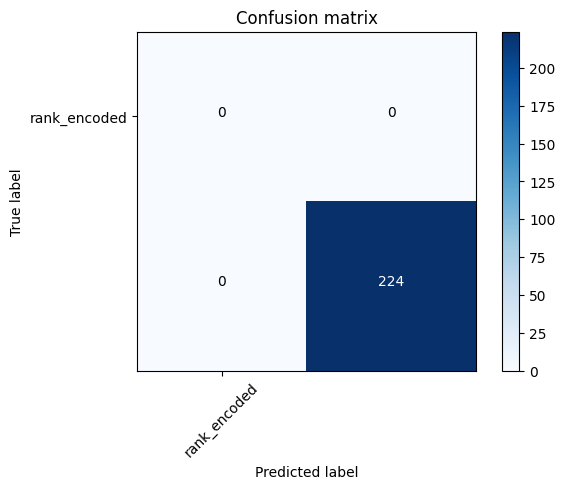

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_LR, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['rank_encoded'],normalize= False,  title='Confusion matrix')

In [ ]:
#********************************************************************************
#knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print('F1 score : ', f1_score(y_test, y_pred_knn, average=None))



KNN Accuracy: 0.8156028368794326
F1 score :  [0.92 0.   0.   0.   0.   0.4  0.11 0.17 0.  ]


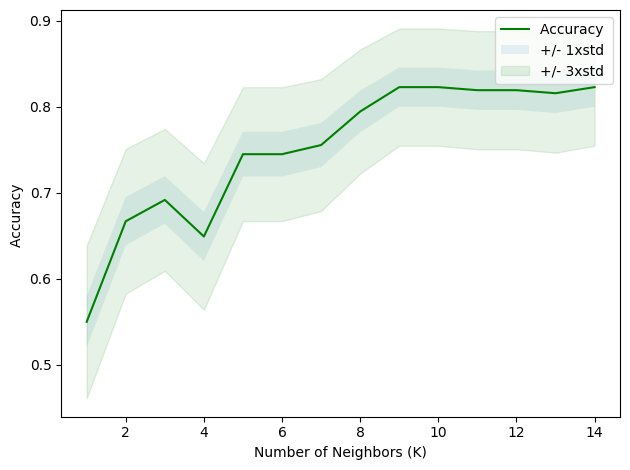

The best accuracy was with 0.8226950354609929 with k= 9


In [ ]:
# other kn
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
#### Plot the model accuracy for a different number of neighbors.

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
#*********************************ANN****************************************************

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
df_deep= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df_deep.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [ ]:

X_dp = df_deep.drop("POSTSEASON", axis=1)  # input variables (X is dataframe)

# Assuming 'POSTSEASON' is the target column, convert it to numeric using rank_encoded:
# Define the custom order mapping
custom_order = {
    'Champions': 1,
    '2ND': 2,
    'F4': 3,
    'E8': 4,
    'S16': 5,
    'R32': 6,
    'R64': 7,
    'R68': 8
}

# Apply the mapping to the POSTSEASON column
df_deep['rank_encoded'] = df_deep['POSTSEASON'].map(custom_order)

# Replace NaN values with 0
df_deep['rank_encoded'] = df_deep['rank_encoded'].fillna(0).astype(float)

y_dp = df_deep["rank_encoded"]  # output variable (y is an array)
# Now, y_dp contains numeric values, allowing you to use np.linspace
bins = np.linspace(y_dp.min(), y_dp.max(), 100)  # Changed y.dp.max() to y_dp.max()
y_binned_dp = np.digitize(y_dp, bins)



X_train_dp, X_test_dp, y_train_dp, y_test_dp = train_test_split(
    X_dp, y_dp, test_size=0.2, shuffle=True, stratify=y_binned_dp, random_state=22
)

print('X_train:', np.shape(X_train_dp), 'X_test:', np.shape(X_test_dp))

X_train: (1124, 23) X_test: (282, 23)


In [ ]:
X_train_dp.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
1383,Fairleigh Dickinson,NEC,33,21,104.5,110.3,0.3494,54.2,52.0,19.7,...,35.7,29.4,51.0,51.3,40.1,35.3,68.0,-9.3,16.0,2019
579,UT Arlington,SB,34,27,108.9,100.4,0.7191,52.5,48.9,18.7,...,34.6,36.6,54.7,49.4,33.0,32.2,71.8,-1.1,NaN,2017
1170,UTSA,CUSA,28,17,104.7,101.6,0.5851,49.5,49.5,16.4,...,26.2,35.6,48.0,50.0,34.3,32.5,73.3,-8.8,NaN,2019
842,Saint Peter's,MAAC,32,14,94.5,99.3,0.3625,49.2,48.4,19.6,...,27.3,42.3,48.1,47.8,33.7,32.9,63.9,-13.0,NaN,2018
864,North Carolina A&T,MEAC,33,20,96.8,111.9,0.1585,51.2,51.5,19.5,...,37.5,31.5,54.3,52.5,30.3,33.1,70.1,-10.3,NaN,2018


In [ ]:
#normalisation
# Get numeric features only for scaling
numeric_features = X_train_dp.select_dtypes(include=np.number).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the numeric features of the training data
scaler.fit(X_train_dp[numeric_features])

# Transform both training and testing data using the fitted scaler
X_train_scaled_dp = scaler.transform(X_train_dp[numeric_features])
X_test_scaled_dp = scaler.transform(X_test_dp[numeric_features])

In [ ]:
#one hot encode outputs
y_train_dp = to_categorical(y_train_dp)
y_test_dp = to_categorical(y_test_dp)

In [ ]:
print("X_train_dp shape:", X_train_dp.shape)
print("X_test_dp shape:", X_test_dp.shape)
print("y_train_dp shape:", y_train_dp.shape)
print("y_test_dp shape:", y_test_dp.shape)


X_train_dp shape: (1124, 23)
X_test_dp shape: (282, 23)
y_train_dp shape: (1124, 9)
y_test_dp shape: (282, 9)


In [ ]:

# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(282, activation='relu',input_shape=(X_train_dp.shape[1],))) #Added input_shape
    model.add(Dense(186, activation='relu'))
    model.add(Dense(186, activation='relu'))
    model.add(Dense(9, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [ ]:

from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')  # handle_unknown='ignore' ensures no errors for unseen categories

# Fit and transform the training data
X_train_dp = encoder.fit_transform(X_train_dp).toarray()  # Converts sparse matrix to dense

# Transform the testing data
X_test_dp = encoder.transform(X_test_dp).toarray()  # Converts sparse matrix to dense

# Ensure data types are float
X_train_dp = X_train_dp.astype(float)
X_test_dp = X_test_dp.astype(float)

In [ ]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train_dp, y_train_dp, validation_data=(X_test_dp, y_test_dp), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test_dp, y_test_dp, verbose=0)

Epoch 1/10
36/36 - 3s - 94ms/step - accuracy: 0.7776 - loss: 0.9546 - val_accuracy: 0.8050 - val_loss: 0.5366
Epoch 2/10
36/36 - 2s - 48ms/step - accuracy: 0.8425 - loss: 0.3803 - val_accuracy: 0.8191 - val_loss: 0.4690
Epoch 3/10
36/36 - 1s - 34ms/step - accuracy: 0.9093 - loss: 0.2223 - val_accuracy: 0.8156 - val_loss: 0.5243
Epoch 4/10
36/36 - 1s - 35ms/step - accuracy: 0.9537 - loss: 0.1206 - val_accuracy: 0.8511 - val_loss: 0.5178
Epoch 5/10
36/36 - 1s - 19ms/step - accuracy: 0.9893 - loss: 0.0508 - val_accuracy: 0.8617 - val_loss: 0.5204
Epoch 6/10
36/36 - 1s - 33ms/step - accuracy: 0.9902 - loss: 0.0224 - val_accuracy: 0.8546 - val_loss: 0.5225
Epoch 7/10
36/36 - 1s - 35ms/step - accuracy: 0.9947 - loss: 0.0135 - val_accuracy: 0.8546 - val_loss: 0.5497
Epoch 8/10
36/36 - 1s - 35ms/step - accuracy: 0.9982 - loss: 0.0082 - val_accuracy: 0.8546 - val_loss: 0.5608
Epoch 9/10
36/36 - 1s - 35ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.8582 - val_loss: 0.5620
Epoch 10/1

In [ ]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.8581560254096985% 
 Error: 0.1418439745903015


In [ ]:
#**************************************************************************************

In [ ]:
#linear_SVM :

In [ ]:
# Create and train a Linear SVM classifier
linear_svm = LinearSVC()
linear_svm.fit(X_train_scaled, y_train)


LinearSVC()

In [ ]:
# Predict the labels for the test set
y_pred_SVM_linear = linear_svm.predict(X_test_scaled)

In [ ]:
# Compute the accuracy and confusion matrix for the Linear SVM
linear_accuracy = accuracy_score(y_test, y_pred_SVM_linear)
linear_confusion_matrix = confusion_matrix(y_test, y_pred_SVM_linear)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_SVM_linear))
print('F1 score : ', f1_score(y_test, y_pred_SVM_linear, average=None))

SVM Accuracy: 0.7907801418439716
F1 score :  [0.93 0.   0.   0.   0.   0.2  0.09 0.12 0.  ]


In [ ]:
#non_linear_SVM :

In [ ]:
# Create and train a Non-Linear SVM classifier with an RBF kernel
nonlinear_svm = SVC(kernel='rbf', C=1, gamma=0.1)
nonlinear_svm.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_nonlinear = nonlinear_svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_nonlinear))
print('F1 score : ', f1_score(y_test, y_pred_nonlinear, average=None))



SVM Accuracy: 0.8049645390070922
F1 score :  [0.9 0.  0.  0.  0.  0.  0.  0.  0. ]


In [ ]:
#******************************************************************************************************************************

In [ ]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train_scaled, y_train)
pred_tree = Tree.predict(X_test_scaled)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_tree))
print('F1 score : ', f1_score(y_test, pred_tree, average=None))


DecisionTrees's Accuracy:  0.8617021276595744
F1 score :  [0.95 0.   0.   0.   0.25 0.36 0.35 0.5  0.  ]


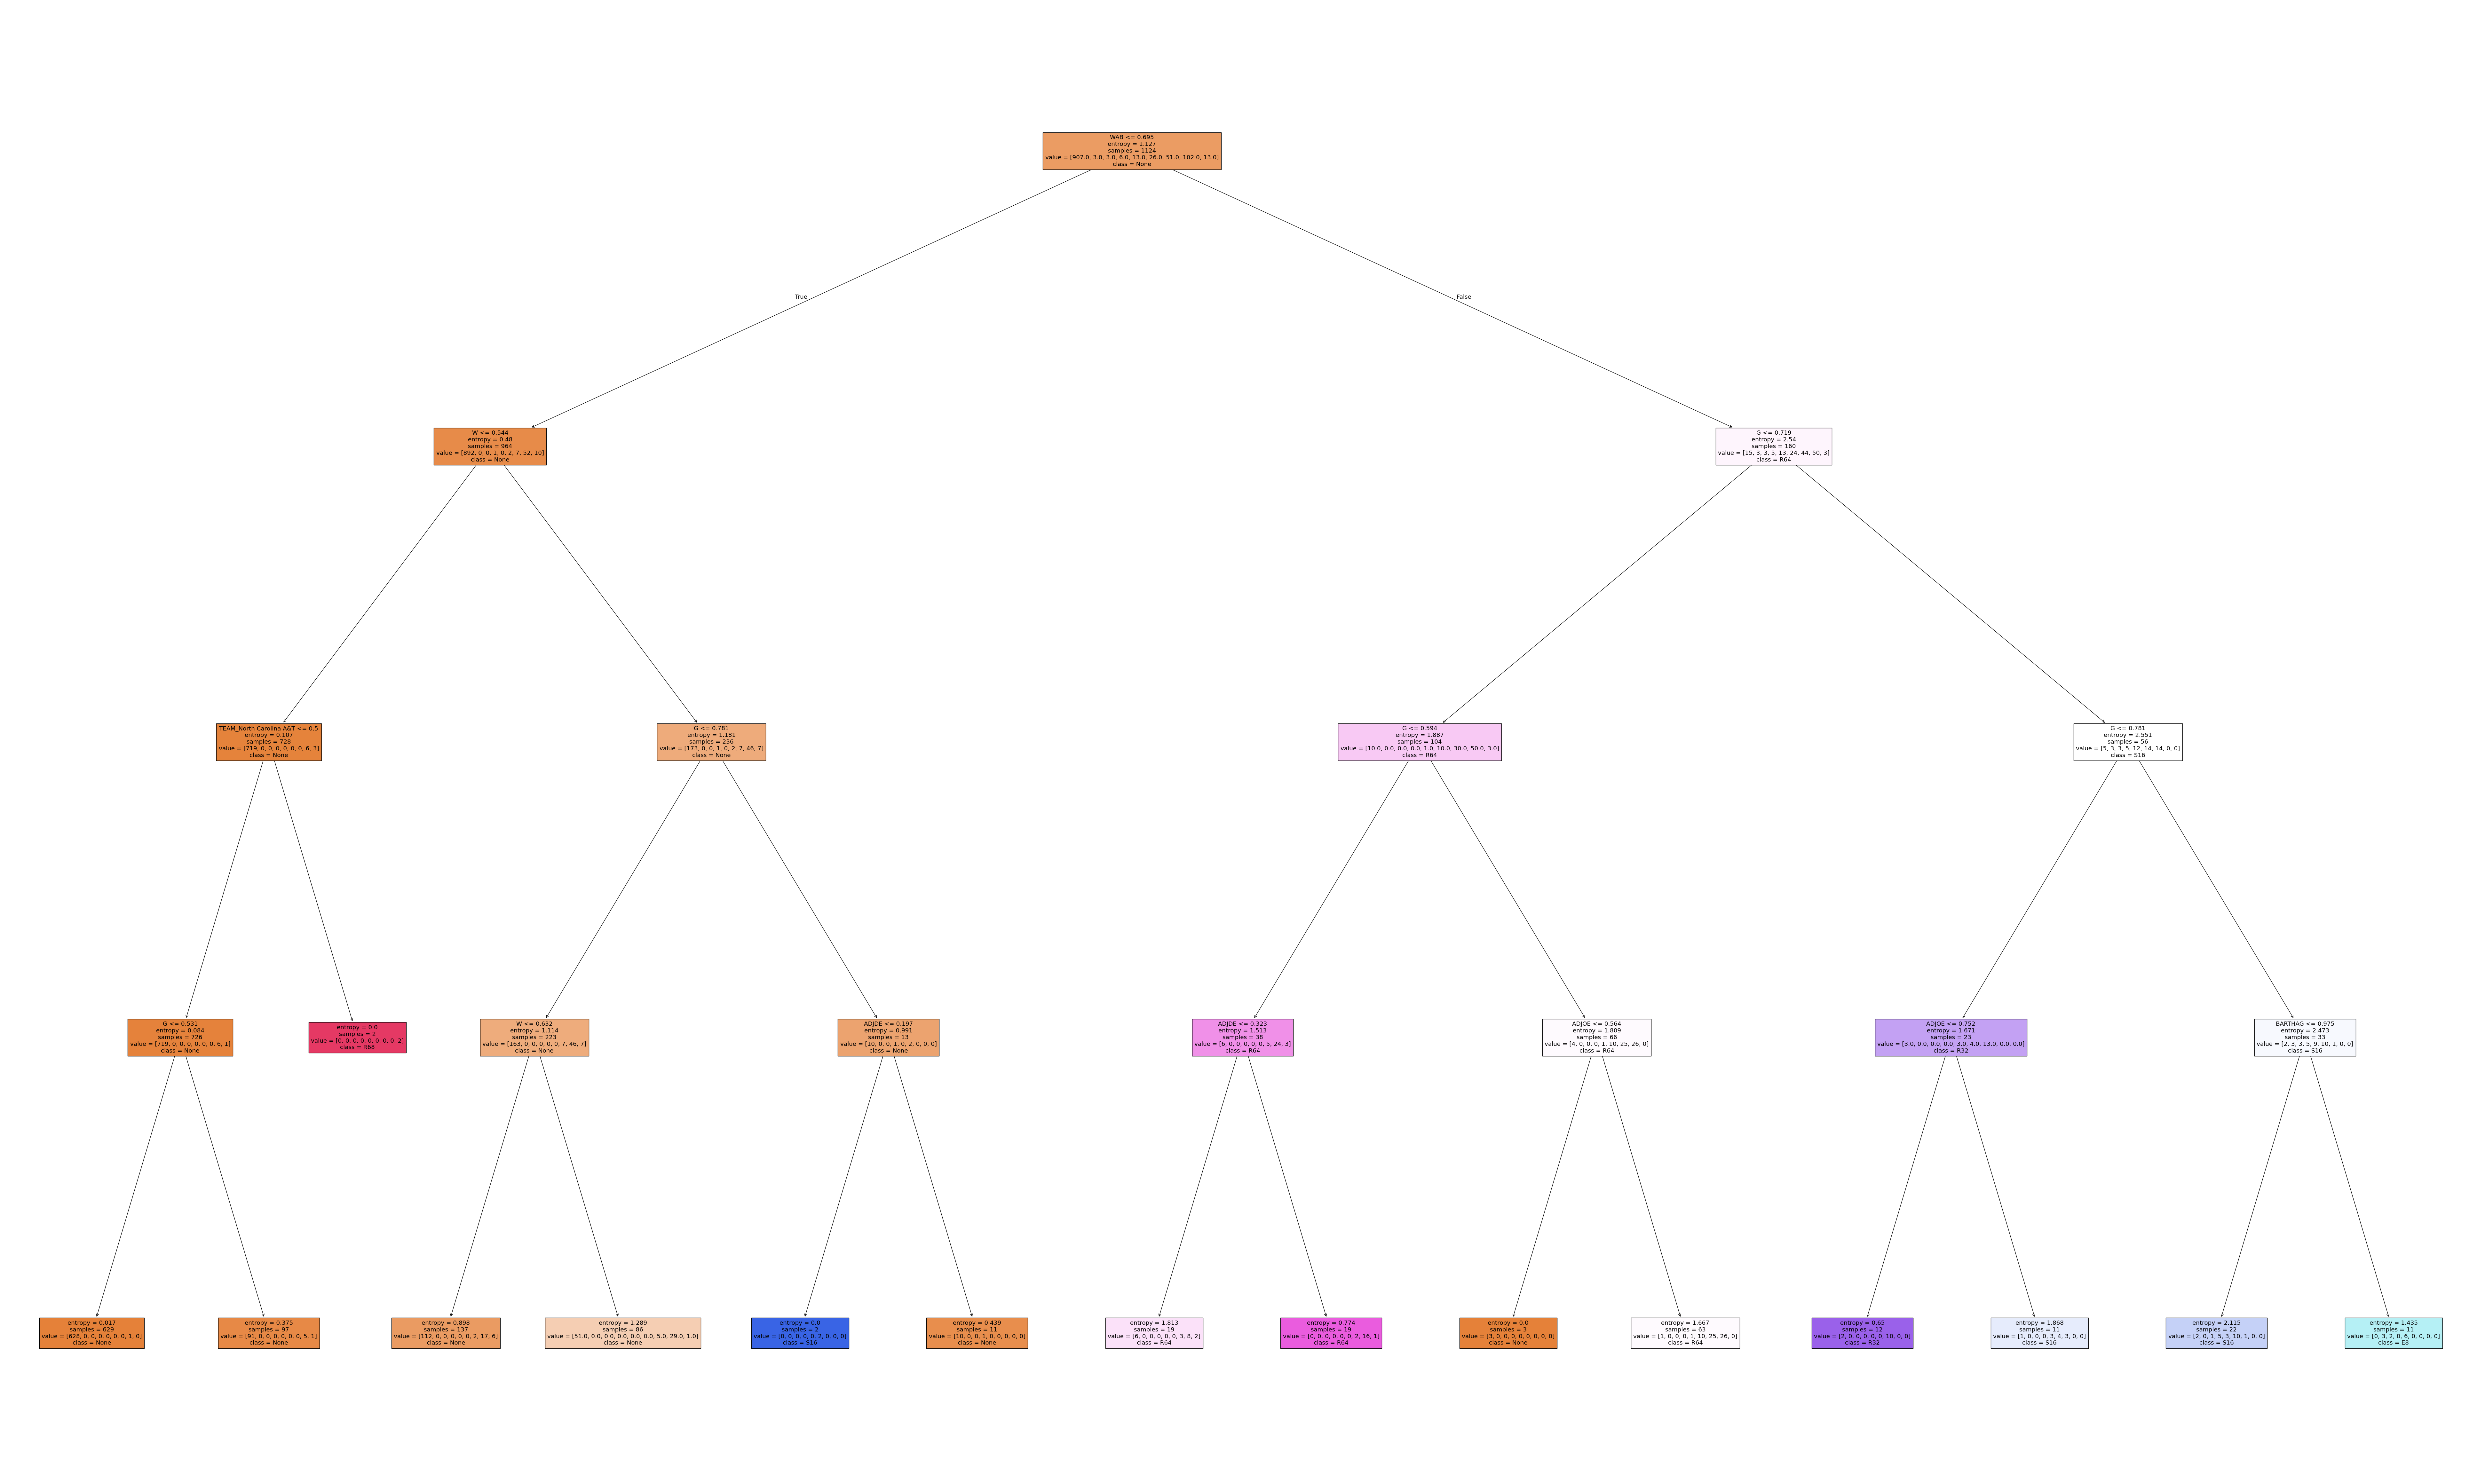

In [ ]:
# Plot the decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(100, 60))  # Set plot size
plot_tree(
    Tree,
    filled=True,
    feature_names=column_names_yes,  # Name the features
    class_names=['None', 'Champions', '2ND', 'F4', 'E8', 'S16', 'R32', 'R64', 'R68']  # Name the classes, including a class for '0'
)
plt.show()